<a href="https://colab.research.google.com/github/ImitatedSky/stock-exchange.rate/blob/main/stock_LSTM_QQQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime



In [2]:
# QQQ
df_QQQ = pdr.get_data_yahoo('QQQ', start='2007-10-15', end=datetime.now())
df_QQQ

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-10-15,53.610001,53.709999,52.700001,53.119999,46.318909,121578700
2007-10-16,52.790001,53.279999,52.680000,52.869999,46.100925,193676600
2007-10-17,53.619999,53.660000,52.680000,53.549999,46.693863,183985200
2007-10-18,53.330002,53.889999,53.119999,53.779999,46.894405,144491200
2007-10-19,53.770000,53.770000,52.389999,52.439999,45.725979,245111500
...,...,...,...,...,...,...
2023-11-06,368.489990,369.779999,366.910004,369.209991,369.209991,38848700
2023-11-07,370.269989,373.579987,369.049988,372.700012,372.700012,50777400
2023-11-08,373.079987,373.790009,370.619995,372.940002,372.940002,35663400


In [3]:
# spy
df_SPY = pdr.get_data_yahoo('SPY', start='2007-10-15', end=datetime.now())
df_SPY

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-10-15,156.270004,156.360001,153.940002,155.009995,113.598328,161151900
2007-10-16,154.410004,154.520004,153.470001,153.779999,112.696938,166525700
2007-10-17,154.979996,155.089996,152.470001,154.250000,113.041412,216687300
2007-10-18,153.449997,154.190002,153.080002,153.690002,112.630966,148367500
2007-10-19,153.089996,156.479996,149.660004,149.669998,109.684937,297169900
...,...,...,...,...,...,...
2023-11-06,435.470001,436.149994,433.679993,435.690002,435.690002,67831700
2023-11-07,435.690002,437.589996,434.510010,436.929993,436.929993,64256100
2023-11-08,437.549988,438.089996,434.869995,437.250000,437.250000,61746000


In [4]:
# BWX
df_BWX = pdr.get_data_yahoo('BWX', start='2007-10-15', end=datetime.now())
df_BWX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-10-15,25.965000,25.969999,25.875000,25.875000,20.872652,82600
2007-10-16,25.885000,25.900000,25.860001,25.885000,20.880714,40400
2007-10-17,25.940001,25.980000,25.934999,25.975000,20.953316,88800
2007-10-18,26.190001,26.219999,26.125000,26.174999,21.114658,71000
2007-10-19,26.209999,26.290001,26.170000,26.270000,21.191294,449800
...,...,...,...,...,...,...
2023-11-06,21.520000,21.570000,21.430000,21.459999,21.459999,902300
2023-11-07,21.490000,21.520000,21.299999,21.510000,21.510000,1468800
2023-11-08,21.530001,21.620001,21.459999,21.559999,21.559999,1182600


In [5]:
# ^VIX
df_VIX = pdr.get_data_yahoo('^VIX', start='2007-10-15', end=datetime.now())
df_VIX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-10-15,18.139999,20.010000,17.950001,19.250000,19.250000,0
2007-10-16,20.070000,20.750000,19.730000,20.020000,20.020000,0
2007-10-17,18.760000,20.110001,18.280001,18.540001,18.540001,0
2007-10-18,19.160000,19.559999,17.730000,18.500000,18.500000,0
2007-10-19,19.150000,22.959999,19.020000,22.959999,22.959999,0
...,...,...,...,...,...,...
2023-11-06,15.390000,15.580000,14.840000,14.890000,14.890000,0
2023-11-07,15.100000,15.170000,14.710000,14.810000,14.810000,0
2023-11-08,14.910000,15.090000,14.300000,14.450000,14.450000,0


In [6]:
# Create a new dataframe with only the 'Adj Close column
data_QQQ = df_QQQ.filter(['Adj Close'])
df_QQQ.rename(columns={'Adj Close': 'AC_QQQ'}, inplace=True)

data_SPY = df_SPY.filter(['Adj Close'])
df_SPY.rename(columns={'Adj Close': 'AC_SPY'}, inplace=True)

data_BWX = df_BWX.filter(['Adj Close'])
df_BWX.rename(columns={'Adj Close': 'AC_BWX'}, inplace=True)

data_VIX = df_VIX.filter(['Adj Close'])
df_VIX.rename(columns={'Adj Close': 'AC_VIX'}, inplace=True)

In [8]:
df = pd.concat([data_QQQ, data_SPY, data_BWX, data_VIX], axis=1, ignore_index=False)
df

,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,
2007-10-15,46.318909,113.598328,20.872652,19.250000
2007-10-16,46.100925,112.696938,20.880714,20.020000
2007-10-17,46.693863,113.041412,20.953316,18.540001
2007-10-18,46.894405,112.630966,21.114658,18.500000
2007-10-19,45.725979,109.684937,21.191294,22.959999
...,...,...,...,...
2023-11-06,369.209991,435.690002,21.459999,14.890000
2023-11-07,372.700012,436.929993,21.510000,14.810000
2023-11-08,372.940002,437.250000,21.559999,14.450000


In [9]:
'''
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price TW ($)', fontsize=18)
plt.show()
'''

"\nplt.figure(figsize=(16,6))\nplt.title('Close Price History')\nplt.plot(df['Close'])\nplt.xlabel('Date', fontsize=18)\nplt.ylabel('Close Price TW ($)', fontsize=18)\nplt.show()\n"

In [10]:
# Convert the dataframe to a numpy array
dataset = df.values
# Get the number of rows to train the model on
# 將所有的80%放下去測試
training_data_len = int(np.ceil( len(dataset) * .80 ))

print(f"總共資料筆數{len(dataset)} , 訓練資料筆數{training_data_len}")

總共資料筆數4048 , 訓練資料筆數3239


In [11]:
# # Scale the data
from sklearn.preprocessing import MinMaxScaler
df2 = df
sc = MinMaxScaler()

scaled_data  = sc.fit_transform(dataset)

scaled_data

array([[0.06365172, 0.15043786, 0.09085989, 0.1374575 ],
       [0.06307264, 0.14825815, 0.09163323, 0.14792658],
       [0.06464782, 0.14909115, 0.09859709, 0.12780422],
       ...,
       [0.93134339, 0.93308121, 0.15678973, 0.07219578],
       [0.92371905, 0.92483525, 0.13952424, 0.08361658],
       [0.94582172, 0.94120621, 0.14240188, 0.06838885]])

建立訓練資料

In [12]:
# Create the training data set
# Create the scaled training data set
# 全部都拿下去訓練
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
timesteps = 60
x_train = []
y_train = []

for i in range(timesteps, len(train_data)):
    x_train.append(train_data[i-timesteps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= timesteps + 1:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data (樣本數, 時間步數, 特徵數)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06365172, 0.06307264, 0.06464782, 0.06518057, 0.06207656,
       0.06353588, 0.06610716, 0.06515746, 0.06348959, 0.06552805,
       0.06603769, 0.06629244, 0.06807612, 0.06569016, 0.06666313,
       0.06585235, 0.06726537, 0.06418454, 0.06043186, 0.05642444,
       0.05348256, 0.0581386 , 0.05663293, 0.05600747, 0.05707305,
       0.05572949, 0.05619276, 0.05482608, 0.0560538 , 0.05406164,
       0.05633175, 0.05985275, 0.06036242, 0.05945891, 0.05846292,
       0.05797645, 0.0600844 , 0.06179858, 0.06182177, 0.06230819,
       0.05948214, 0.06054771, 0.05989909, 0.05867139, 0.05579899,
       0.05616961, 0.05614647, 0.05850925, 0.06083503, 0.06173942,
       0.06234226, 0.06088142, 0.06076546, 0.0593742 , 0.05749588,
       0.05798283, 0.05283498, 0.05230163, 0.04940305, 0.05172192])]
[0.051884244872978234]

[array([0.06365172, 0.06307264, 0.06464782, 0.06518057, 0.06207656,
       0.06353588, 0.06610716, 0.06515746, 0.06348959, 0.06552805,
       0.06603769, 0.06629244, 0.0

**建立訓練模型**

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
#
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(4))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error' , metrics=['accuracy'])

# Train the model
model.fit( x_train, y_train, batch_size=1, epochs=1 )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 4)                 104       
                                                                 
Total params: 117697 (459.75 KB)
Trainable params: 117697 (459.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3179/3179 [==============================] - 213s 66ms/step - loss: 4.4678e-04 - accuracy: 0.0000e+00


測試資料


剩下20%的資料




In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 2748 to 2892  ，共 144
test_data = scaled_data[training_data_len - timesteps: , :]
# Create the data sets x_test and y_test
x_test = []
y_test_scaled_data = scaled_data[training_data_len:, :]
y_test = dataset[training_data_len:, :]  # 這邊是沒有經過scaler 的資料

for i in range(timesteps, len(test_data)):
    x_test.append(test_data[i-timesteps:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data (樣本數, 時間步數, 特徵數)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

loss, acc = model.evaluate(x_test, y_test_scaled_data)
print(f"accuracy：{acc}") # in LSTM models ， 'accuracy' metric is not typically used.
print(f"loss：{loss}")


# inverse scaler
predictions = sc.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"rmse : {rmse}")

26/26 [==============================] - 2s 33ms/step
rmse : 29.665026064527197


In [15]:
predictions

array([[270.7122  , 319.86917 ,  26.872929,  57.597015],
       [273.26215 , 322.8083  ,  26.945574,  58.100063],
       [275.6171  , 325.45126 ,  27.011456,  58.56274 ],
       ...,
       [357.6456  , 416.7992  ,  29.334076,  74.79163 ],
       [360.79123 , 420.3663  ,  29.419516,  75.40467 ],
       [362.63586 , 422.28098 ,  29.465946,  75.75668 ]], dtype=float32)

<ipython-input-24-536e72916f60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:,0]


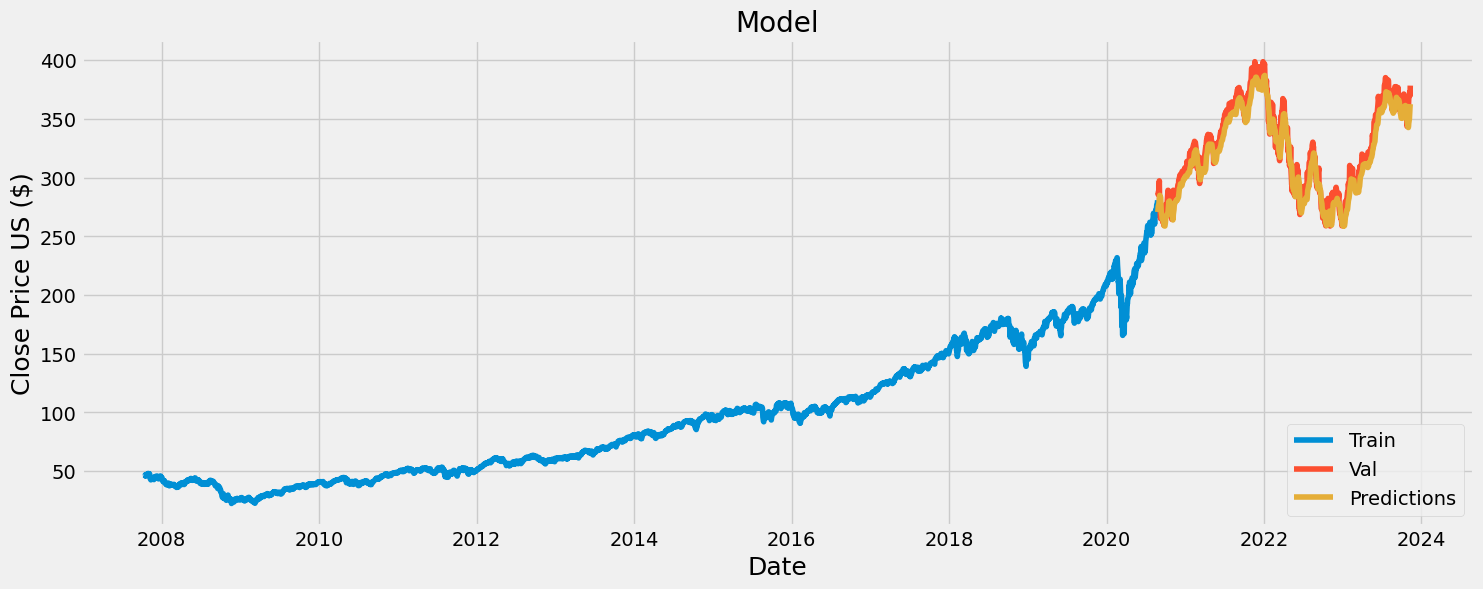

In [24]:
# Plot the df
train = data_QQQ[:training_data_len ]
valid = data_QQQ[training_data_len: ]
valid['Predictions'] = predictions[:,0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price US ($)', fontsize=18)

plt.plot( train['Adj Close'] )
plt.plot( valid[['Adj Close', 'Predictions']] )

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-25-44740b6b3ad5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:,0]


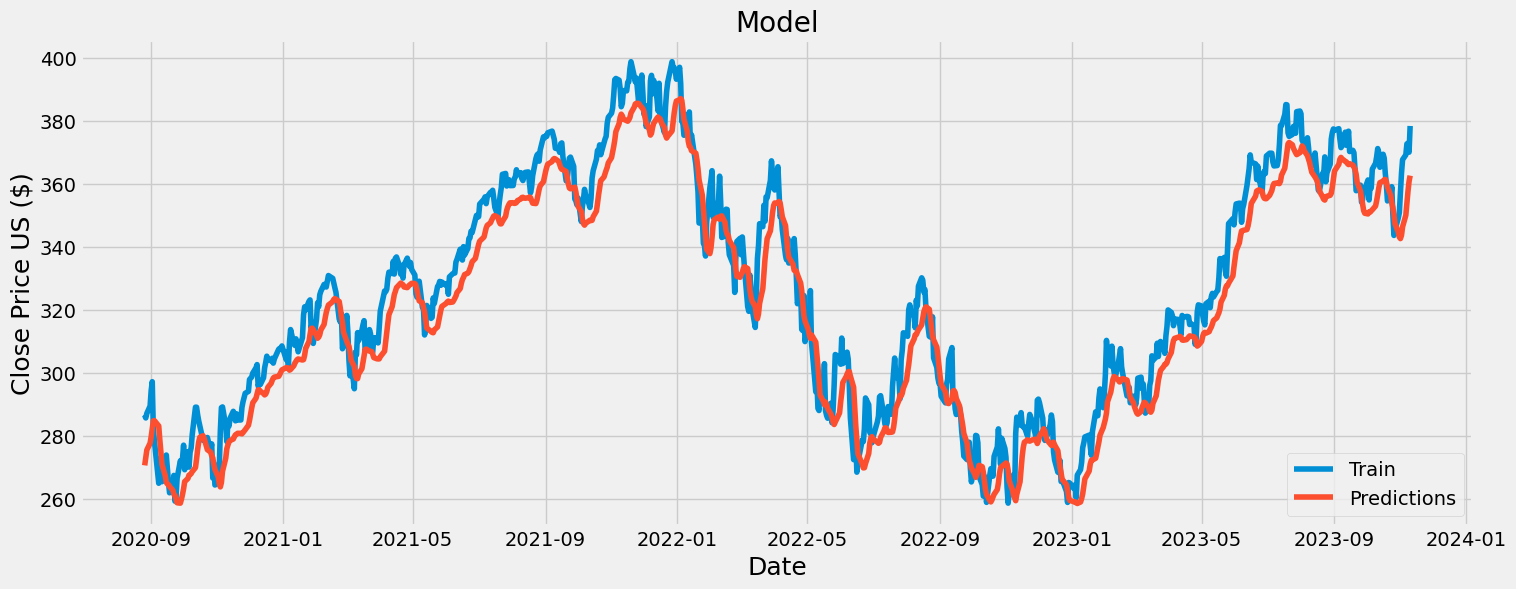

In [25]:
# Plot the data
train = data_QQQ[:training_data_len]
valid = data_QQQ[training_data_len:]

valid['Predictions'] = predictions[:,0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price US ($)', fontsize=18)
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train',  'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,Adj Close,Predictions
Date,,
2020-08-26,286.658936,270.712189
2020-08-27,285.765411,273.262146
2020-08-28,287.218536,275.617096
2020-08-31,289.525879,277.755310
2020-09-01,294.474396,279.793182
...,...,...
2023-11-06,369.209991,350.059265
2023-11-07,372.700012,353.860962
2023-11-08,372.940002,357.645599
